<a href="https://colab.research.google.com/github/Nathan-Wang-GT/creAItivity.github-io/blob/main/ImageClassification_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import sklearn

!pip install scikit-plot
import scikitplot

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.callbacks import Callback
from sklearn.metrics import mean_squared_error

from scikitplot.metrics import plot_confusion_matrix

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pathlib
dataset_url = "/content/drive/MyDrive/CS 4641 Final Project/Images"
# data_dir = tf.keras.utils.get_file('Images', origin=dataset_url, untar=False)
data_dir = pathlib.Path(dataset_url)

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3267


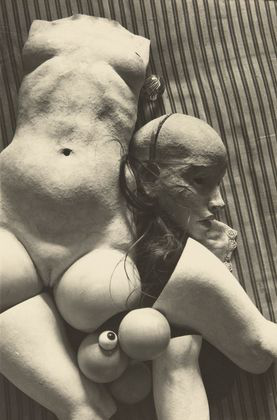

In [ ]:
aggressive = list(data_dir.glob('Aggressive/*'))
PIL.Image.open(str(aggressive[0]))

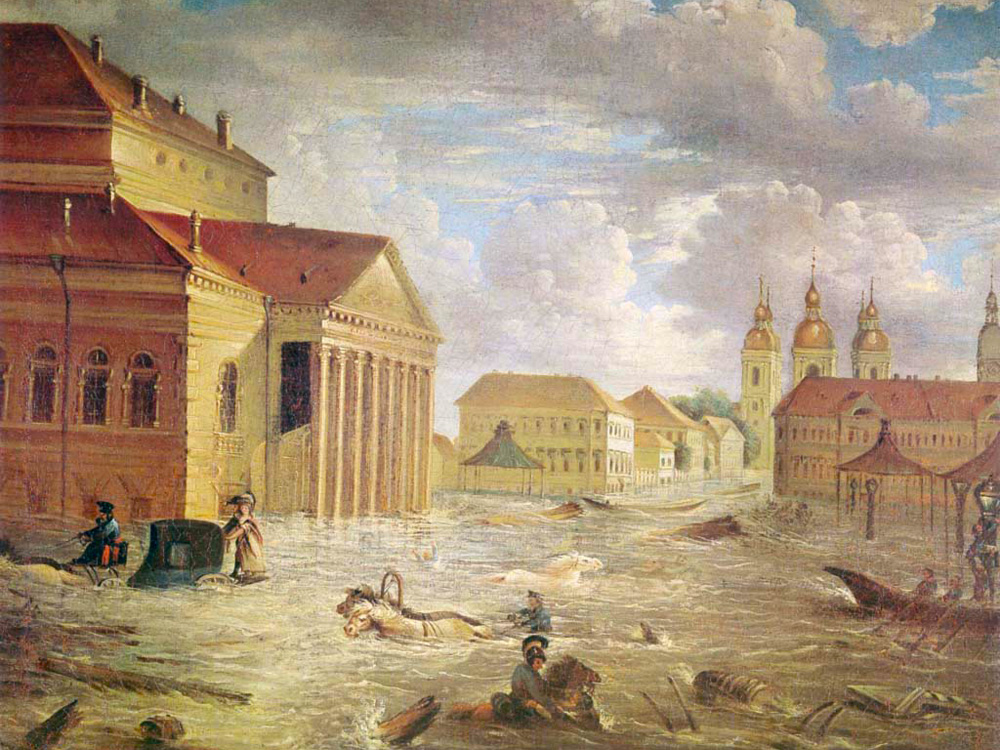

In [ ]:
PIL.Image.open(str(aggressive[1]))

In [6]:
batch_size = 32
img_height = 125
img_width = 125

In [83]:
dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    seed = 123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 3279 files belonging to 7 classes.


In [99]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3279 files belonging to 7 classes.
Using 2624 files for training.


In [100]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3279 files belonging to 7 classes.
Using 655 files for validation.


In [101]:
class_names = train_ds.class_names
print(class_names)

['Aggressive', 'Aggressive + Calm', 'Aggressive + Euphoric', 'Aggressive + Euphoric + Calm', 'Calm', 'Euphoric', 'Euphoric + Calm']


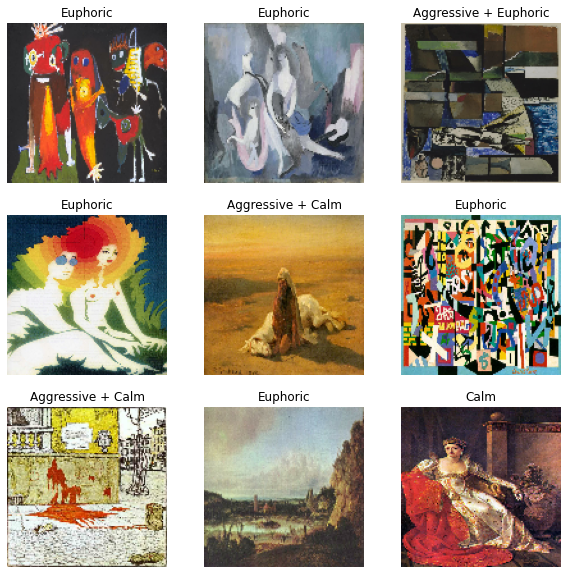

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [113]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 125, 125, 3)
(32,)


In [103]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [104]:
normalization_layer = layers.Rescaling(1./255)

In [105]:
num_classes = 7

**Original**

In [106]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [107]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [108]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_15 (Rescaling)    (None, 125, 125, 3)       0         
                                                                 
 conv2d_33 (Conv2D)          (None, 125, 125, 16)      448       
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 62, 62, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 62, 62, 32)        4640      
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 31, 31, 64)      

In [109]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
82/82 [==============================] - 75s 583ms/step - loss: 1.4023 - accuracy: 0.4783 - val_loss: 1.3490 - val_accuracy: 0.4931
Epoch 2/10
82/82 [==============================] - 41s 495ms/step - loss: 1.3177 - accuracy: 0.4973 - val_loss: 1.3777 - val_accuracy: 0.4840
Epoch 3/10
82/82 [==============================] - 41s 495ms/step - loss: 1.2824 - accuracy: 0.5084 - val_loss: 1.3313 - val_accuracy: 0.4962
Epoch 4/10
82/82 [==============================] - 41s 495ms/step - loss: 1.1849 - accuracy: 0.5587 - val_loss: 1.4212 - val_accuracy: 0.4855
Epoch 5/10
82/82 [==============================] - 41s 499ms/step - loss: 1.0371 - accuracy: 0.6021 - val_loss: 1.4682 - val_accuracy: 0.4779
Epoch 6/10
82/82 [==============================] - 41s 496ms/step - loss: 0.8426 - accuracy: 0.6848 - val_loss: 1.6536 - val_accuracy: 0.4824
Epoch 7/10
82/82 [==============================] - 41s 496ms/step - loss: 0.6376 - accuracy: 0.7641 - val_loss: 2.0479 - val_accuracy: 0.4977

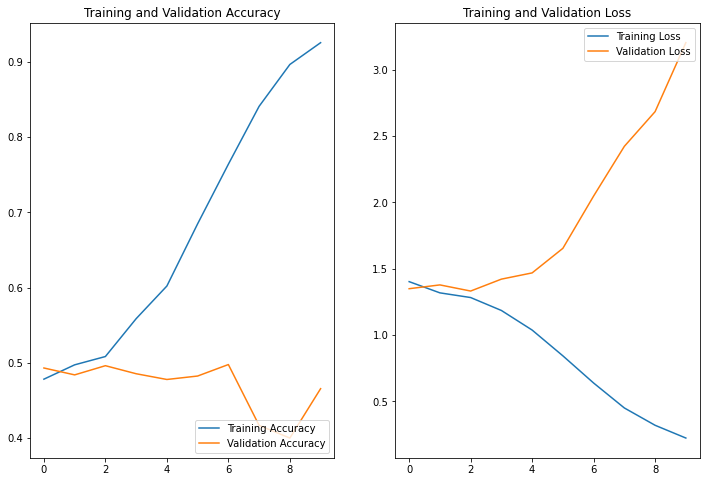

In [110]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [121]:
predictions = model.predict(val_ds).argmax(axis=-1)
labels = np.concatenate([y for x, y in val_ds], axis=0)
rmse = mean_squared_error(labels, predictions, squared=False)
print(rmse)

1.9835198877344709


In [16]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

**Using Dropout**

In [123]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [124]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [125]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 125, 125, 3)       0         
                                                                 
 rescaling_16 (Rescaling)    (None, 125, 125, 3)       0         
                                                                 
 conv2d_36 (Conv2D)          (None, 125, 125, 16)      448       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 62, 62, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 62, 62, 32)        4640      
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                

In [126]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
82/82 [==============================] - 49s 587ms/step - loss: 1.3859 - accuracy: 0.4768 - val_loss: 1.4066 - val_accuracy: 0.4916
Epoch 2/15
82/82 [==============================] - 47s 571ms/step - loss: 1.3279 - accuracy: 0.4939 - val_loss: 1.3588 - val_accuracy: 0.5008
Epoch 3/15
82/82 [==============================] - 47s 575ms/step - loss: 1.3252 - accuracy: 0.4893 - val_loss: 1.3720 - val_accuracy: 0.4977
Epoch 4/15
82/82 [==============================] - 47s 574ms/step - loss: 1.3138 - accuracy: 0.5000 - val_loss: 1.3449 - val_accuracy: 0.4931
Epoch 5/15
82/82 [==============================] - 50s 610ms/step - loss: 1.3000 - accuracy: 0.4981 - val_loss: 1.3512 - val_accuracy: 0.4931
Epoch 6/15
82/82 [==============================] - 47s 569ms/step - loss: 1.2931 - accuracy: 0.5027 - val_loss: 1.3423 - val_accuracy: 0.4855
Epoch 7/15
82/82 [==============================] - 49s 602ms/step - loss: 1.2834 - accuracy: 0.5072 - val_loss: 1.3363 - val_accuracy: 0.4901

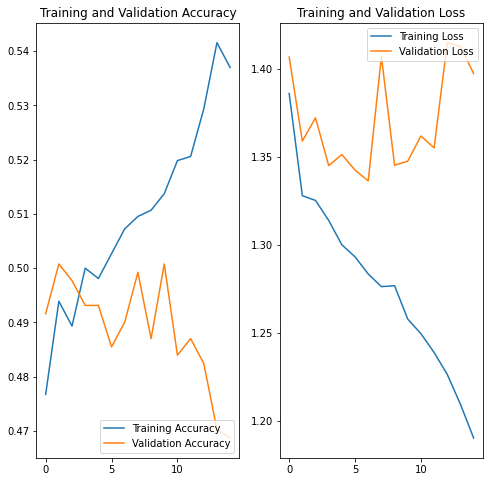

In [127]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [128]:
predictions = model.predict(val_ds).argmax(axis=-1)
labels = np.concatenate([y for x, y in val_ds], axis=0)
rmse = mean_squared_error(labels, predictions, squared=False)
print(rmse)

1.921354484064592


**LeNet-5**

In [129]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 5, padding='same', activation='tanh'),
  layers.AveragePooling2D(),
  layers.Conv2D(16, 5, padding='same', activation='tanh'),
  layers.AveragePooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='tanh'),
  layers.Dense(128, activation='tanh'),
  layers.Dense(num_classes)
])

In [130]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [131]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 125, 125, 3)       0         
                                                                 
 rescaling_17 (Rescaling)    (None, 125, 125, 3)       0         
                                                                 
 conv2d_39 (Conv2D)          (None, 125, 125, 16)      1216      
                                                                 
 average_pooling2d (AverageP  (None, 62, 62, 16)       0         
 ooling2D)                                                       
                                                                 
 conv2d_40 (Conv2D)          (None, 62, 62, 16)        6416      
                                                                 
 average_pooling2d_1 (Averag  (None, 31, 31, 16)       0         
 ePooling2D)                                         

In [132]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
82/82 [==============================] - 57s 684ms/step - loss: 1.4813 - accuracy: 0.4699 - val_loss: 1.4325 - val_accuracy: 0.4931
Epoch 2/15
82/82 [==============================] - 55s 676ms/step - loss: 1.4138 - accuracy: 0.4802 - val_loss: 1.4085 - val_accuracy: 0.4931
Epoch 3/15
82/82 [==============================] - 55s 670ms/step - loss: 1.4101 - accuracy: 0.4802 - val_loss: 1.4368 - val_accuracy: 0.4931
Epoch 4/15
82/82 [==============================] - 55s 669ms/step - loss: 1.4234 - accuracy: 0.4802 - val_loss: 1.4043 - val_accuracy: 0.4947
Epoch 5/15
82/82 [==============================] - 55s 670ms/step - loss: 1.4096 - accuracy: 0.4802 - val_loss: 1.4294 - val_accuracy: 0.4931
Epoch 6/15
82/82 [==============================] - 55s 670ms/step - loss: 1.4108 - accuracy: 0.4802 - val_loss: 1.4251 - val_accuracy: 0.4931
Epoch 7/15
82/82 [==============================] - 60s 737ms/step - loss: 1.4104 - accuracy: 0.4802 - val_loss: 1.4187 - val_accuracy: 0.4931

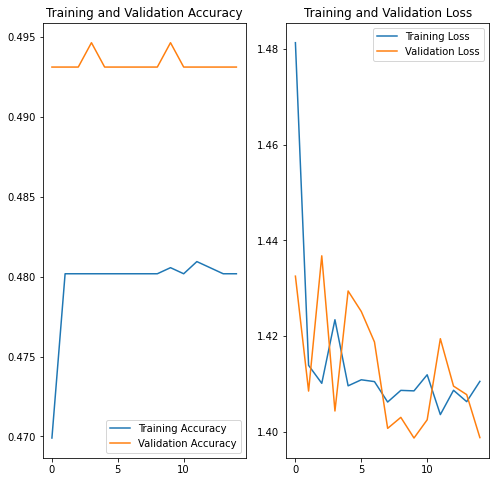

In [133]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [134]:
predictions = model.predict(val_ds).argmax(axis=-1)
labels = np.concatenate([y for x, y in val_ds], axis=0)
rmse = mean_squared_error(labels, predictions, squared=False)
print(rmse)

1.7504634064740057


**LeNet-5 Using Relu**

In [135]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 5, padding='same', activation='relu'),
  layers.AveragePooling2D(),
  layers.Conv2D(16, 5, padding='same', activation='relu'),
  layers.AveragePooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [136]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [137]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 125, 125, 3)       0         
                                                                 
 rescaling_18 (Rescaling)    (None, 125, 125, 3)       0         
                                                                 
 conv2d_41 (Conv2D)          (None, 125, 125, 16)      1216      
                                                                 
 average_pooling2d_2 (Averag  (None, 62, 62, 16)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_42 (Conv2D)          (None, 62, 62, 16)        6416      
                                                                 
 average_pooling2d_3 (Averag  (None, 31, 31, 16)       0         
 ePooling2D)                                         

In [138]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
82/82 [==============================] - 58s 691ms/step - loss: 1.4022 - accuracy: 0.4718 - val_loss: 1.3813 - val_accuracy: 0.4947
Epoch 2/15
82/82 [==============================] - 57s 696ms/step - loss: 1.3568 - accuracy: 0.4787 - val_loss: 1.3609 - val_accuracy: 0.4931
Epoch 3/15
82/82 [==============================] - 56s 689ms/step - loss: 1.3317 - accuracy: 0.4768 - val_loss: 1.3650 - val_accuracy: 0.4656
Epoch 4/15
82/82 [==============================] - 56s 683ms/step - loss: 1.3339 - accuracy: 0.4806 - val_loss: 1.3516 - val_accuracy: 0.4931
Epoch 5/15
82/82 [==============================] - 55s 667ms/step - loss: 1.3271 - accuracy: 0.4878 - val_loss: 1.3533 - val_accuracy: 0.4809
Epoch 6/15
82/82 [==============================] - 56s 685ms/step - loss: 1.3121 - accuracy: 0.4817 - val_loss: 1.3537 - val_accuracy: 0.4885
Epoch 7/15
82/82 [==============================] - 65s 789ms/step - loss: 1.3065 - accuracy: 0.4977 - val_loss: 1.3364 - val_accuracy: 0.4855

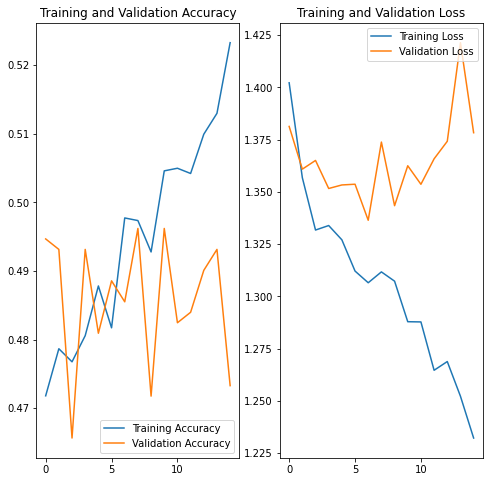

In [139]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [140]:
predictions = model.predict(val_ds).argmax(axis=-1)
labels = np.concatenate([y for x, y in val_ds], axis=0)
rmse = mean_squared_error(labels, predictions, squared=False)
print(rmse)

1.8066881682804534


**AlexNet**

In [141]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 11, padding='same', activation='relu'),
  layers.MaxPooling2D(3),
  layers.Conv2D(16, 5, padding='same', activation='relu'),
  layers.MaxPooling2D(3),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(3),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [142]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [143]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 125, 125, 3)       0         
                                                                 
 rescaling_19 (Rescaling)    (None, 125, 125, 3)       0         
                                                                 
 conv2d_43 (Conv2D)          (None, 125, 125, 16)      5824      
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 41, 41, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 41, 41, 16)        6416      
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                

In [144]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
82/82 [==============================] - 115s 1s/step - loss: 1.4110 - accuracy: 0.4783 - val_loss: 1.3698 - val_accuracy: 0.4947
Epoch 2/15
82/82 [==============================] - 112s 1s/step - loss: 1.3774 - accuracy: 0.4809 - val_loss: 1.3941 - val_accuracy: 0.5008
Epoch 3/15
82/82 [==============================] - 111s 1s/step - loss: 1.3588 - accuracy: 0.4783 - val_loss: 1.3449 - val_accuracy: 0.4992
Epoch 4/15
82/82 [==============================] - 112s 1s/step - loss: 1.3789 - accuracy: 0.4897 - val_loss: 1.3844 - val_accuracy: 0.4947
Epoch 5/15
82/82 [==============================] - 112s 1s/step - loss: 1.3487 - accuracy: 0.4916 - val_loss: 1.3526 - val_accuracy: 0.4977
Epoch 6/15
82/82 [==============================] - 112s 1s/step - loss: 1.3372 - accuracy: 0.4886 - val_loss: 1.3321 - val_accuracy: 0.4962
Epoch 7/15
82/82 [==============================] - 112s 1s/step - loss: 1.3241 - accuracy: 0.4958 - val_loss: 1.3209 - val_accuracy: 0.4901
Epoch 8/15
82

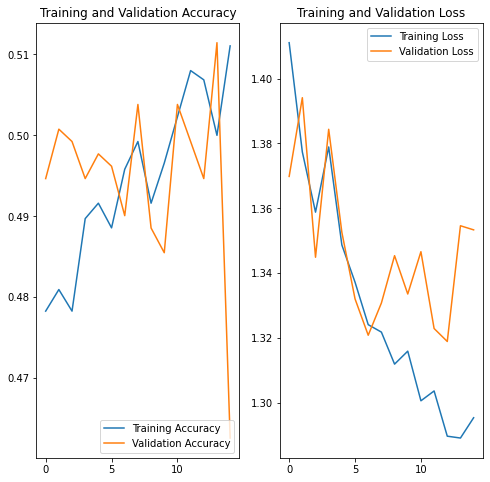

In [145]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [146]:
predictions = model.predict(val_ds).argmax(axis=-1)
labels = np.concatenate([y for x, y in val_ds], axis=0)
rmse = mean_squared_error(labels, predictions, squared=False)
print(rmse)

1.8087995259814835
